In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

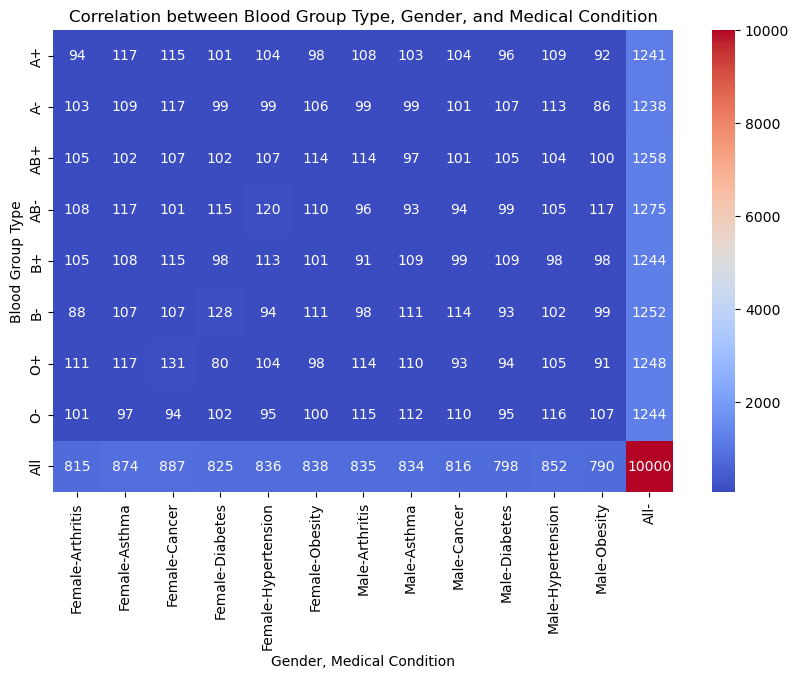

The Average Billing Amount required to treat each Medical Condition
  Medical Condition  Billing Amount
0         Arthritis    25187.631255
1            Asthma    25416.869895
2            Cancer    25539.096133
3          Diabetes    26060.116129
4      Hypertension    25198.033973
5           Obesity    25720.842683


In [2]:
# Create DataFrame
df = pd.read_csv('healthcare_dataset.csv')

# Q1 - a
# Plotting correlation heatmap between Blood Group Typ, Gender, and Medical Condition
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(index=df['Blood Group Type'], columns=[df['Gender'], df['Medical Condition']], margins=True), annot=True, fmt='d', cmap='coolwarm')
plt.title('Correlation between Blood Group Type, Gender, and Medical Condition')
plt.xlabel('Gender, Medical Condition')
plt.ylabel('Blood Group Type')
plt.show()

# Q1 - b
print('The Average Billing Amount required to treat each Medical Condition')
avg_billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean().reset_index()
print(avg_billing_by_condition)


In [3]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=df['Blood Group Type'], columns=[df['Gender'], df['Medical Condition']])

# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_score = cramers_v(contingency_table)

print("Cramér's V score:", cramers_v_score)

Cramér's V score: 0.0


In [4]:
#A value closer to 0 indicates no association